# PHYS 105: Computational Physics I
### Spring 2018
### In-Class Exercise 10.1

## Orbital Motion -- Kepler's Laws


Now let's consider motion entirely above Earth's surface---an orbiting
satellite, say, or a planet orbiting the Sun. You may modify the demo
program for week 10, with
Earth's center at the origin of coordinates and units such that
$GM=1$, to verify the basic laws of orbital motion.  Take the time
step to be $\delta t = 0.005$.  Start the satellite's trajectory at
${\bf r} = (r_0, 0)$ with ${\bf v} = (0, v_0)$.  In the adopted units,
a circular orbit should have $v_0 = 1/\sqrt{r_0}$.

Theory predicts that the orbit should be an ellipse with
the gravitating object at one focus (Kepler's first law).  The
conventional measure of the size of an ellipse is the *semi-major
axis* $a$, which is just the average of the satellite's minimum
($r_{min}$) and maximum ($r_{max}$) distances from Earth's center: $a
= \textstyle\frac12(r_{min}+r_{max})$.  

  **Instructions**:
  

1. **Modify** your program to follow the motion
for one orbital period (operationally defined as the time required for
the satellite to return to the point of origin and where one of the components
of the velocity changes sign) and **determine** numerically the semi-major 
axes for orbits having
 1. $r_0 = 1.0, v_0 = 1.0$,
 2. $r_0 = 1.0, v_0 = 0.9$,
 3. $r_0 = 1.0, v_0 = 0.7$,
 4. $r_0 = 1.0, v_0 = 1.1$,
 5. $r_0 = 1.0, v_0 = 1.3$,
 6. $r_0 = 2.0, v_0 = 0.6$,
 7. $r_0 = 2.0, v_0 = 0.9$.
 
 **Show** all 7 orbits on *a single plot*.
 
2. For the same orbits, **determine** the orbital period $P$ (as
defined above) and **compute** the ratio $P^2/a^3$.  Are your results
consistent with Kepler's third law of planetary motion, which states
that this ratio is constant?

In [2]:
def acc(x, y):
    # inverse-square law
    r = sqrt(x*x+y*y)
    return -GM*x/pow(r, 3), -GM*y/pow(r, 3) 		


def take_a_step(x, y, vx, vy, t, dt):
    # Predictor:
    ax, ay = acc(x, y)

    x  += vx*dt + 0.5*ax*dt*dt
    y  += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    t  += dt

    # Corrector:
    ax1, ay1 = acc(x, y)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    return x,y,vx,vy,t



For r0 = 1.00, v0 = 1.00, the rmin = 1.00 and rmax = 1.00, and a = 1.00
For r0 = 1.00, v0 = 1.00, the Period = 6.28 and the ratio P^2 / a^3 = 39.50
And Eccentricity = 0.00

For r0 = 1.00, v0 = 0.90, the rmin = 0.68 and rmax = 1.00, and a = 0.84
For r0 = 1.00, v0 = 0.90, the Period = 4.84 and the ratio P^2 / a^3 = 39.56
And Eccentricity = 0.19

For r0 = 1.00, v0 = 0.70, the rmin = 0.32 and rmax = 1.00, and a = 0.66
For r0 = 1.00, v0 = 0.70, the Period = 3.39 and the ratio P^2 / a^3 = 39.56
And Eccentricity = 0.51

For r0 = 1.00, v0 = 1.10, the rmin = 1.00 and rmax = 1.53, and a = 1.27
For r0 = 1.00, v0 = 1.10, the Period = 8.95 and the ratio P^2 / a^3 = 39.49
And Eccentricity = 0.21

For r0 = 1.00, v0 = 1.30, the rmin = 1.00 and rmax = 5.45, and a = 3.23
For r0 = 1.00, v0 = 1.30, the Period = 36.41 and the ratio P^2 / a^3 = 39.48
And Eccentricity = 0.69

For r0 = 2.00, v0 = 0.60, the rmin = 1.13 and rmax = 2.00, and a = 1.56
For r0 = 2.00, v0 = 0.60, the Period = 12.28 and the ratio P^

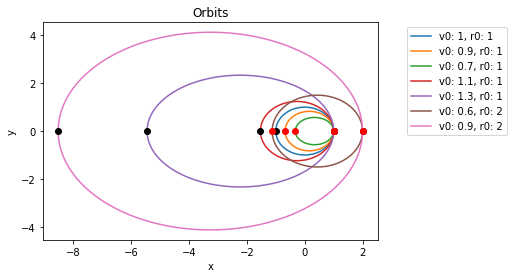

In [5]:
import sys
from math import *
import matplotlib.pyplot as plt

GM = 1.0				# define units
r0_list = [1, 1, 1, 1, 1, 2, 2]
v0_list = [1,.9,.7,1.1,1.3,.6,.9]

for i in range(len(r0_list)):
    r0 = r0_list[i]
    v0 = v0_list[i]

    # Initialize the trajectory.
    t  = 0.0
    x  = r0
    y  = 0.0

    vx = 0.0
    vy = v0				# default is circular orbit

    dt    = 0.005
    t_max = 50.0

    xplot = [x]
    yplot = [y]

    rmax = r0
    rmin = r0
    
    xmax = x
    ymax = y
    
    xmin = x
    ymin = y
    

    while True:
        vx_p = vx
        
        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
        
        r_temp = sqrt(x**2 + y**2)
        
        if r_temp >= rmax: 
            rmax = r_temp
            xmax = x
            ymax = y
            
        if r_temp <= rmin: 
            rmin = r_temp
            xmin = x
            ymin = y
        
        xplot.append(x)
        yplot.append(y)
        
        if (vx_p > 0) and (vx <= 0):
            break
        
    plt.plot(xplot,yplot, label = 'v0: {}, r0: {}'.format(v0, r0))
    plt.plot(xmax, ymax, 'ko')
    plt.plot(xmin, ymin, 'ro')
    plt.title('Orbits')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.4,1))
        
    a = .5*(rmin + rmax)
    ratio = t**2 / a ** 3
    eccentricity = 1 - rmin/a
    
    print('\nFor r0 = {:.2f}, v0 = {:.2f}, the rmin = {:.2f} and rmax = {:.2f}, and a = {:.2f}'.format(r0, v0, rmin, rmax, a))
    print('For r0 = {:.2f}, v0 = {:.2f}, the Period = {:.2f} and the ratio P^2 / a^3 = {:.2f}'.format(r0, v0, t, ratio))
    print('And Eccentricity = {:.2f}'.format(eccentricity))

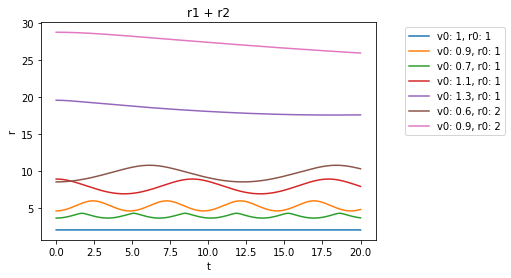

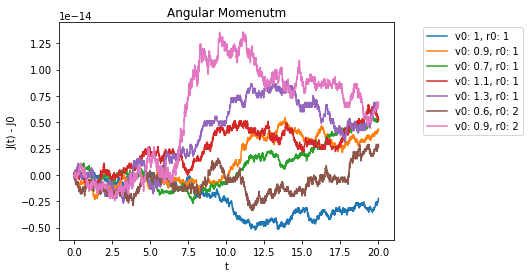

In [26]:
import sys
from math import *
import matplotlib.pyplot as plt

GM = 1.0				# define units
r0_list = [1, 1, 1, 1, 1, 2, 2]
v0_list = [1,.9,.7,1.1,1.3,.6,.9]


for i in range(len(r0_list)):
    r0 = r0_list[i]
    v0 = v0_list[i]
    
    # Initialize the trajectory.
    t  = 0.0
    x  = r0
    y  = 0.0

    vx = 0.0
    vy = v0				# default is circular orbit
    J0 = (x * vy) - (y * vx)

    dt    = 0.005
    tmax = 20
    
    t_list =  [t]
    xplot = [x]
    yplot = [y]
    
    r_foci_list = []
    J_list = [J0 - J0]

    rmax = r0
    rmin = r0
    
    xmax = x
    ymax = y
    
    xmin = x
    ymin = y
    
   
    
    while t < tmax:
        vx_p = vx
        
        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
        
        r_temp = sqrt(x**2 + y**2)
        
        if r_temp >= rmax: 
            rmax = r_temp
            xmax = x
            ymax = y
            
        if r_temp <= rmin: 
            rmin = r_temp
            xmin = x
            ymin = y
            
        t_list.append(t)
        xplot.append(x)
        yplot.append(y)
        
        J_temp = (x * vy) - (y * vx)
        J_list.append(J_temp - J0)
        
        if (vx_p > 0) and (vx <= 0):
            pass
    
        
    a = .5*(rmin + rmax)
    ratio = t**2 / a ** 3
    eccentricity = 1 - (rmin/a)
    
    f1 = (0, 0)
    v_circular = 1 / sqrt(r0)
    
    if v0 < v_circular: 
        f2 = (2* a * e, 0)
    elif v0 > v_circular:
        f2 = (-2 * a * e, 0)
    else:
        f2 = (0, 0)
    
    for i in range(len(xplot)):
        r1x = abs(xplot[i] - f1[0])
        r1y = abs(yplot[i] - f1[1])
        r1 = sqrt(r1x**2 + r1y**2)
     
        r2x = abs(xplot[i] - f2[0])
        r2y = abs(yplot[i] - f2[1])
        r2 = sqrt(r2x**2 + r2y**2)
        
        r_foci_list.append(r1 + r2)
    
    plt.figure(1)
    plt.plot(t_list, r_foci_list, label = 'v0: {}, r0: {}'.format(v0, r0))  
    plt.title('r1 + r2')
    plt.xlabel('t')
    plt.ylabel('r')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.4,1))
        
    plt.figure(2)
    plt.plot(t_list, J_list, label = 'v0: {}, r0: {}'.format(v0, r0))  
    plt.title('Angular Momenutm')
    plt.xlabel('t')
    plt.ylabel('J(t) - J0')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.4,1))
        